In [ ]:
import tensorflow as tf
print(tf.__version__)


2.3.0


In [ ]:
from google.colab import files
uploaded=files.upload()


Saving heart_classification.csv to heart_classification.csv


In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data=pd.read_csv("heart_classification.csv")

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.shape

(303, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Checking missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Converting catagorical data as category type
data["sex"]=data.sex.astype("category")
data["cp"]=data.cp.astype("category")
data["fbs"]=data.fbs.astype("category")
data["exang"]=data.exang.astype("category")
data["slope"]=data.slope.astype("category")
data["thal"]=data.thal.astype("category")
data["target"]=data.target.astype("category")

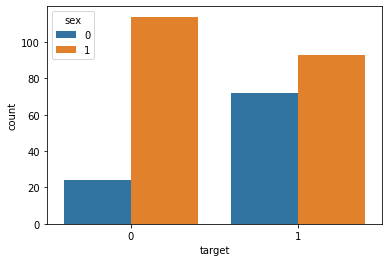

In [ ]:
# Visualizing different dependent variables
sns.countplot(x="target",hue="sex",data=data)

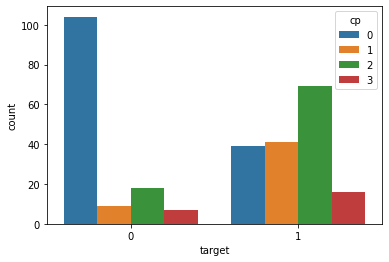

In [ ]:
sns.countplot(x="target",hue="cp",data=data)

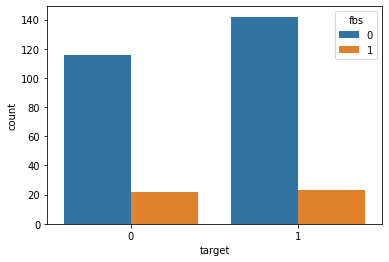

In [ ]:
sns.countplot(x="target",hue="fbs",data=data)

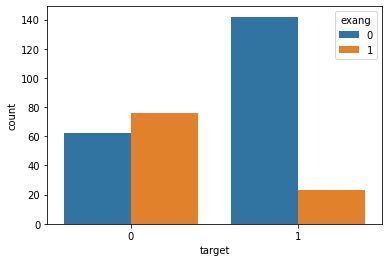

In [ ]:
sns.countplot(x="target",hue="exang",data=data)

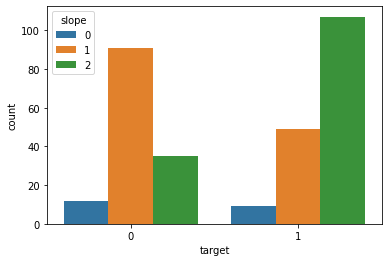

In [ ]:
sns.countplot(x="target",hue="slope",data=data)

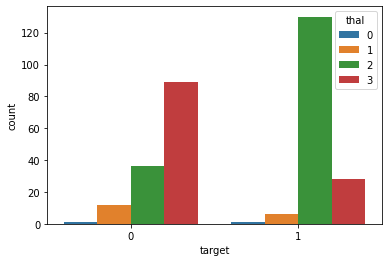

In [ ]:
sns.countplot(x="target",hue="thal",data=data)

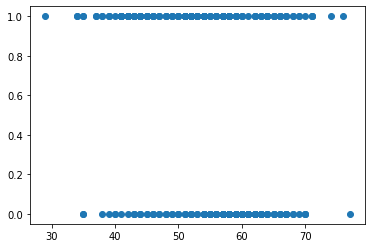

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=data["age"],y=data["target"])

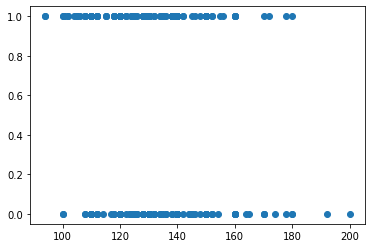

In [ ]:
plt.scatter(x=data["trestbps"],y=data["target"])

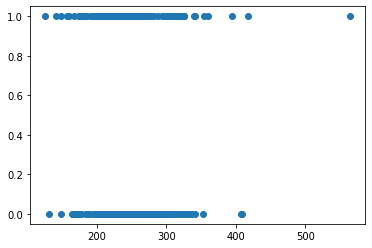

In [ ]:
plt.scatter(x=data["chol"],y=data["target"])

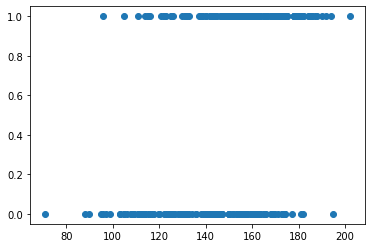

In [ ]:
plt.scatter(x=data["thalach"],y=data["target"])

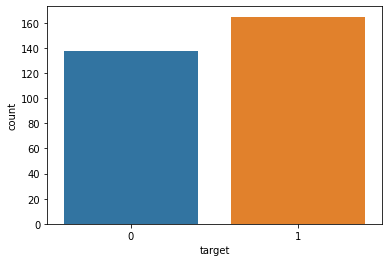

In [ ]:
sns.countplot(data["target"])

In [ ]:
# Class Distribution
c0,c1=data["target"].value_counts()
print("0 = ",(c0/(c0+c1))*100)
print("1 = ",(c1/(c0+c1))*100)

0 =  54.45544554455446
1 =  45.54455445544555


In [ ]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[2,10,12])],remainder="passthrough")
X=np.array(ct.fit_transform(X))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
N,D=X_train.shape

In [ ]:
model=tf.keras.models.Sequential([tf.keras.layers.Input(shape=(D,)),tf.keras.layers.Dense(1,activation="sigmoid")])

In [ ]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
r=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100)

Epoch 1/100
8/8 [==============================] - 0s 23ms/step - loss: 0.6695 - accuracy: 0.6116 - val_loss: 0.7204 - val_accuracy: 0.6230
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6545 - accuracy: 0.6281 - val_loss: 0.7075 - val_accuracy: 0.6557
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6406 - accuracy: 0.6281 - val_loss: 0.6949 - val_accuracy: 0.6557
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6278 - accuracy: 0.6405 - val_loss: 0.6831 - val_accuracy: 0.6721
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6152 - accuracy: 0.6405 - val_loss: 0.6719 - val_accuracy: 0.6885
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6035 - accuracy: 0.6529 - val_loss: 0.6615 - val_accuracy: 0.6885
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5923 - accuracy: 0.6653 - val_loss: 0.6514 - val_accuracy: 0.6885
Epoch 8/100
8/8 [=========

In [ ]:
print("Train score: ",model.evaluate(X_train,Y_train))
print("Test score: ",model.evaluate(X_test,Y_test))

8/8 [==============================] - 0s 1ms/step - loss: 0.3397 - accuracy: 0.8636
Train score:  [0.33965781331062317, 0.8636363744735718]
2/2 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8689
Test score:  [0.4138643145561218, 0.868852436542511]


In [ ]:
p=model.predict(X_test)

In [ ]:
y_pred=np.round(p).flatten()

In [ ]:
model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8689


[0.4138643145561218, 0.868852436542511]

In [ ]:
model.save("HeartDiseaseClassification_tensorflow")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: HeartDiseaseClassification_tensorflow/assets


In [ ]:
model=tf.keras.models.load_model("HeartDiseaseClassification_tensorflow")
print(model.layers)
model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8689


[0.4138643145561218, 0.868852436542511]

In [ ]:
#from google.colab import files
#files.download("HeartDiseaseClassification_tensorflow")